In [1]:
import tfinterface as ti
import tensorflow as tf
import dataget as dg
import cv2
import numpy as np
import matplotlib.pyplot as plt

/home/cristian/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
graph = tf.Graph()

with tf.gfile.GFile("frozen_models/ssd_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb", "rb") as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

with graph.as_default():
    tf.import_graph_def(graph_def, name="")

In [3]:
[ op for op in graph.get_operations() if op.type == "Placeholder"]

[<tf.Operation 'image_tensor' type=Placeholder>]

In [7]:
input_names = dict(
    image = "image_tensor:0"
)

output_names = dict(
    class_probs = "detection_classes:0",
    boxes = "detection_boxes:0",
    scores = "detection_scores:0"
)

predictor = ti.estimator.FrozenGraphPredictor(input_names, output_names, "frozen_models/ssd_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb")

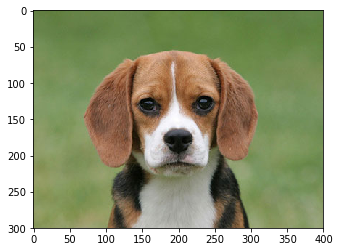

In [8]:
img = cv2.imread("images/Beagle-1.jpg")[..., ::-1]
plt.imshow(img)
plt.show()

In [9]:
predictor.predict(image = [img])

{'boxes': array([[[0.1858786 , 0.15666237, 0.9915168 , 0.79438376],
         [0.37170938, 0.2613815 , 0.9792745 , 0.75425804],
         [0.06799182, 0.9036197 , 0.89664257, 1.        ],
         [0.85139966, 0.7347697 , 1.        , 0.90375507],
         [0.21292578, 0.8782924 , 0.58579564, 0.98552865],
         [0.83333486, 0.6613616 , 0.99808115, 0.98075056],
         [0.83516324, 0.7742163 , 1.        , 0.95199263],
         [0.19067207, 0.14017023, 0.9702476 , 0.5323717 ],
         [0.7152653 , 0.6593822 , 1.        , 0.8493608 ],
         [0.11712596, 0.81969976, 0.77274096, 1.        ],
         [0.9315672 , 0.70759535, 0.99768424, 1.        ],
         [0.54829645, 0.17388883, 0.9958434 , 0.8028468 ],
         [0.5013845 , 0.        , 1.        , 0.17615665],
         [0.6128816 , 0.31611866, 0.99928766, 0.64236987],
         [0.7413452 , 0.729503  , 1.        , 0.93824345],
         [0.1162039 , 0.48540956, 0.9122546 , 0.9156675 ],
         [0.8731166 , 0.7586591 , 0.98387516, 0